In [1]:
import pytools4dart as ptd

In [19]:
sim=ptd.simulation('RTM_reference0')

In [4]:
sim.write(overwrite=True)

Updating optical properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...


In [5]:
sim.core.phase.subpaths()

['version',
 'build_',
 'Phase',
 'Phase.calculatorMethod',
 'Phase.accelerationEngine',
 'Phase.AtmosphereRadiativeTransfer',
 'Phase.ExpertModeZone',
 'Phase.DartInputParameters',
 'Phase.EngineParameter',
 'Phase.DartProduct',
 'Phase.SensorImageSimulation',
 'Phase.ExternalScripts',
 'Phase.AtmosphereRadiativeTransfer.TOAtoBOA',
 'Phase.AtmosphereRadiativeTransfer.ForwardScatteringFunction',
 'Phase.AtmosphereRadiativeTransfer.ForwardScatteringFunction.gas_u',
 'Phase.AtmosphereRadiativeTransfer.ForwardScatteringFunction.aerosols_u',
 'Phase.ExpertModeZone.expertMode',
 'Phase.ExpertModeZone.nbThreads',
 'Phase.ExpertModeZone.useExternalScripts',
 'Phase.ExpertModeZone.ExpertModeDartFt',
 'Phase.ExpertModeZone.ExpertModeLidar',
 'Phase.ExpertModeZone.ExpertModeDartSn',
 'Phase.DartInputParameters.linkPassiveRsRb',
 'Phase.DartInputParameters.MonteCarlo',
 'Phase.DartInputParameters.Lidar',
 'Phase.DartInputParameters.SpectralDomainTir',
 'Phase.DartInputParameters.SpectralIntervals

In [14]:
sim.core.phase.set_nodes(meanLambda=[0.55,0.4])

In [15]:
sim.write(overwrite=True)

Updating optical properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...


In [20]:
sim.core.coeff_diff.set_nodes(reflectanceFactor=[1,0.8,0.5])

In [21]:
sim.write(overwrite=True)

Updating optical properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...


In [28]:
from functions import *

In [29]:
atmosphere_param()

FileNotFoundError: [Errno 2] No such file or directory: '/home/fayari/DART1425/user_data/simulations/RTM_referenceO/input/atmosphere.xml'

In [33]:
import os
import shutil
from netCDF4 import Dataset
import pytools4dart as ptd
import math
import numpy as np
def atmosphere_param():
    atmosphere_nc='/home/fayari/DART1425/user_data/simulations/RTM_reference0/output/atmosphere.nc'
    atmosphere_xml='/home/fayari/DART1425/user_data/simulations/RTM_reference0/input/atmosphere.xml'
    tree = ET.parse(atmosphere_xml)  # Remplace 'votre_fichier.xml' par le nom réel
    root = tree.getroot()
    l=[]
    # Trouver l'élément <IsAtmosphere> et lire l'attribut 'typeOfAtmosphere'
    is_atmosphere_elem = root.find('.//IsAtmosphere')  # Recherche récursive
    type_value = int(is_atmosphere_elem.get('typeOfAtmosphere'))
    if type_value == 1 :

        with Dataset(atmosphere_nc, "r") as nc_file:
            spectral_number=nc_file.groups['Transmittance']['All_gas_transmittance'].shape[0]
            for i in range(spectral_number):
                tg_scat = nc_file.groups['Transmittance']['All_gas_transmittance'][i][0]
                tg_abs = np.prod(nc_file.groups['Transmittance']['All_gas_transmittance'][i][1:15])
                optical_depth = nc_file.groups['Transmittance']['Aerosols optical_depth'][i][0]
                albedo = nc_file.groups['Transmittance']['Aerosol_single_scattering albedo'][i][0]
                a = nc_file.groups['Henyey Greenstein']['a'][i][0]
                g1 = nc_file.groups['Henyey Greenstein']['g1'][i][0]
                g2 = nc_file.groups['Henyey Greenstein']['g2'][i][0]
                l.append([tg_scat, tg_abs, optical_depth, albedo, a, g1,g2])
            return l
    else :

        with Dataset(atmosphere_nc, "r") as nc_file:
            GOD = nc_file.getncattr('Gas_optical_depth_scattering')
            tg_scat=math.exp(-GOD)
            tg_abs = nc_file.getncattr('Transmittance_of_gases_absorb')
            optical_depth = nc_file.getncattr('Total_aerosols_optical_depth')
            albedo = nc_file.getncattr('Aerosol_albedo')
            a = nc_file.getncattr('Henyey_Greenstein_a')
            g1 = nc_file.getncattr('Henyey_Greenstein_g1')
            g2 = nc_file.getncattr('Henyey_Greenstein_g2')
            l.append([tg_scat, tg_abs, optical_depth, albedo, a, g1,g2])
            return l

In [34]:
atmosphere_param()

[[0.9050936704131968,
  0.9640054022990896,
  0.3237436186503654,
  0.9493981570150052,
  1.0,
  0.8834599429481179,
  0.0],
 [0.687256286294797,
  0.9962477162053509,
  0.44683825434609803,
  0.9530334778458416,
  1.0,
  0.8994393507591999,
  0.0]]

In [36]:
a=[1]
b=[]
b=a.append(a)
b

In [45]:
import re

def EXTRACT_BOA_RT():
    with open(f'/home/fayari/DART1425/user_data/simulations/RTM_reference0/output/dart.txt', 'r') as file:
        boa_values = []
        for line in file:
            if "BOA Total" in line:
                # Extraire tous les nombres de la ligne
                values = re.findall(r'[-+]?\d*\.\d+|\d+', line)
                boa_values.extend([float(v) for v in values])
    # Retourner les 100 dernières valeurs
    return boa_values[-2:]


In [46]:
EXTRACT_BOA_RT()

[726.243183, 619.145323]

In [48]:
sim=ptd.simulation('RTM_reference0')

In [49]:
lamda_values=[0.4,0.6,0.7,1.3]

In [50]:
Edit_lambda(lamda_values[0:2])

Updating optical properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...


In [51]:
def EXTRACT_BOA_RT():
    with open(f'/home/fayari/DART1425/user_data/simulations/RTM_reference0/output/dart.txt', 'r') as file:
        boa_values = []
        for line in file:
            if "BOA Total" in line:
                # Extraire tous les nombres de la ligne
                values = re.findall(r'[-+]?\d*\.\d+|\d+', line)
                boa_values.extend([float(v) for v in values])
    # Retourner les 100 dernières valeurs
    return boa_values[-2:]


In [52]:
EXTRACT_BOA_RT()

[]

In [53]:
import numpy as np

scale = 500  # plus petit → plus concentré vers 0
n = 1000

values = np.random.exponential(scale=scale, size=n)

# Limiter à 5000 (cap max)
values = np.clip(values, 0, 5000)

# Si tu veux des entiers
values = values.astype(int).tolist()


In [54]:
values

[45,
 31,
 157,
 1455,
 508,
 1518,
 1391,
 134,
 47,
 946,
 248,
 74,
 438,
 267,
 59,
 105,
 36,
 298,
 156,
 118,
 1663,
 178,
 978,
 751,
 498,
 271,
 41,
 6,
 143,
 637,
 136,
 789,
 393,
 251,
 229,
 137,
 273,
 52,
 628,
 267,
 739,
 1159,
 994,
 235,
 2139,
 345,
 428,
 372,
 155,
 585,
 192,
 1387,
 261,
 562,
 707,
 206,
 523,
 1222,
 51,
 133,
 405,
 109,
 159,
 793,
 21,
 815,
 406,
 76,
 853,
 265,
 173,
 378,
 465,
 124,
 3,
 48,
 1136,
 236,
 236,
 347,
 2298,
 244,
 705,
 668,
 223,
 230,
 249,
 545,
 475,
 447,
 2178,
 874,
 187,
 45,
 700,
 56,
 678,
 933,
 450,
 36,
 36,
 980,
 114,
 116,
 119,
 25,
 332,
 400,
 1171,
 405,
 576,
 128,
 70,
 32,
 9,
 1216,
 409,
 435,
 32,
 417,
 2914,
 201,
 65,
 507,
 2123,
 126,
 254,
 68,
 14,
 421,
 581,
 49,
 607,
 36,
 472,
 148,
 223,
 111,
 425,
 329,
 346,
 362,
 153,
 178,
 122,
 55,
 74,
 23,
 301,
 823,
 120,
 712,
 114,
 543,
 1666,
 116,
 1072,
 116,
 81,
 99,
 460,
 349,
 379,
 814,
 828,
 47,
 114,
 214,
 496,
 139,


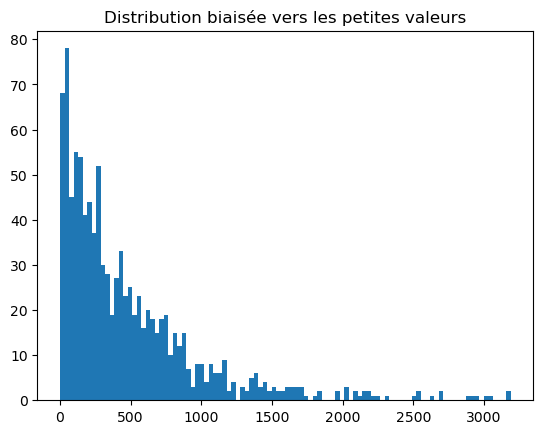

In [55]:
import matplotlib.pyplot as plt

plt.hist(values, bins=100)
plt.title("Distribution biaisée vers les petites valeurs")
plt.show()


In [56]:
import pytools4dart as ptd
sim=ptd.simulation('RTM_reference0')

In [57]:
sim.core.atmosphere.set_nodes(aerosolOptDepthFactor=1.2)
sim.write(overwrite=True)

Updating optical properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...


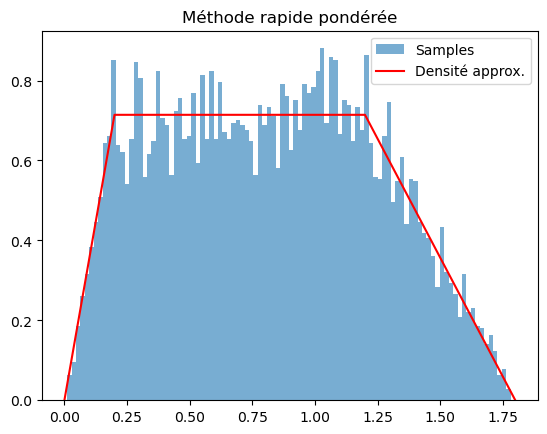

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Discrétiser l'intervalle
x = np.linspace(0, 1.8, 1000)

# Définir les poids selon ta fonction par morceaux
weights = np.piecewise(
    x,
    [x < 0.2, (x >= 0.2) & (x < 1.2), x >= 1.2],
    [lambda x: x / 0.2, 1, lambda x: (1.8 - x) / 0.6]
)

# Normaliser les poids
weights /= weights.sum()

# Tirage rapide de 10 000 valeurs
samples = np.random.choice(x, size=10000, p=weights)

# Affichage
plt.hist(samples, bins=100, density=True, alpha=0.6, label="Samples")
plt.plot(x, weights / (x[1] - x[0]), 'r-', label="Densité approx.")
plt.title("Méthode rapide pondérée")
plt.legend()
plt.show()


In [60]:
import pytools4dart as ptd

In [62]:
sim=ptd.simulation('RTM_reference0')
sim.core.atmosphere.set_nodes(gasCumulativeModelName='TROPICAL')
sim.write(overwrite=True)

Updating optical properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...


In [ ]:
def Edit_GasModel(new_value):
    sim=ptd.simulation('RTx = np.linspace(0, 1.8, 1000)

# Définir les poids selon ta fonction par morceaux
weights = np.piecewise(
    x,
    [x < 0.2, (x >= 0.2) & (x < 1.2), x >= 1.2],
    [lambda x: x / 0.2, 1, lambda x: (1.8 - x) / 0.6]
)

# Normaliser les poids
weights /= weights.sum()

# Tirage rapide de 10 000 valeurs
samples = np.random.choice(x, size=10000, p=weights)M_reference0')
    sim.core.atmosphere.set_nodes(gasModelName=new_value)
    sim.core.atmosphere.set_nodes(gasCumulativeModelName=new_value)
    sim.core.atmosphere.set_nodes(temperatureModelName=new_value)
    sim.write(overwrite=True)

In [64]:
Edit_GasModel('TROPICAL')

Updating optical properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...


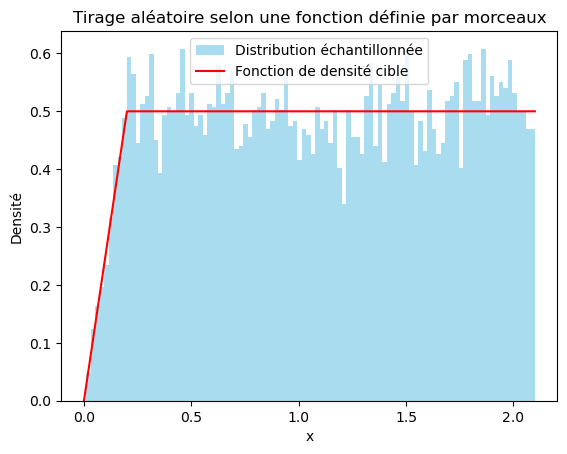

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Générer les points entre 0 et 2.1
x = np.linspace(0, 2.1, 1000)

# Définir les poids selon la fonction en morceaux
weights = np.piecewise(
    x,
    [x < 0.2, x >= 0.2],
    [lambda x: x / 0.2, 1]
)

# Normaliser les poids pour qu'ils forment une distribution de probabilité
weights /= weights.sum()

# Exemple : tirer 10 000 échantillons
samples = np.random.choice(x, size=10000, p=weights)

# Tracer l'histogramme pour vérifier la distribution
plt.hist(samples, bins=100, density=True, alpha=0.7, color='skyblue', label="Distribution échantillonnée")
plt.plot(x, weights / (x[1] - x[0]), color='red', label="Fonction de densité cible")
plt.xlabel("x")
plt.ylabel("Densité")
plt.legend()
plt.title("Tirage aléatoire selon une fonction définie par morceaux")
plt.show()


In [97]:
def k_gaz_USDT():
    x = np.linspace(0, 2.1, 1000)

    # Définir les poids (densité par morceaux)
    weights = np.piecewise(
        x,
        [x < 0.2, x >= 0.2],
        [lambda x: x / 0.2, 1]
    )

    # Normaliser pour que la somme des probabilités soit 1
    weights /= weights.sum()

    # Tirer UNE valeur
    value = np.random.choice(x, size=1, p=weights)[0]
    return value

In [134]:
import numpy as np

def k_gaz_TROPICAL():
    x = np.linspace(0, 2.0, 1000)  # Étendue plus large pour couvrir toute la distribution

    # Définir les poids (densité par morceaux)
    weights = np.piecewise(
        x,
        [x < 1.37, 
         (x >= 1.38) & (x < 1.5), 
         (x >= 1.5) & (x <= 1.75),
         x > 1.75],
        [0,  # Avant 1.38, poids nul
         1,  # Plateau constant
         lambda x: (1.75 - x) / (1.75 - 1.5),  # Descente linéaire
         0]  # Après 1.75, poids nul
    )

    # Normaliser les poids
    weights /= weights.sum()

    # Tirer une valeur selon cette distribution
    return np.random.choice(x, size=1, p=weights)[0]


In [151]:
k_gaz_TROPICAL()

1.5475475475475475

In [218]:
import numpy as np

def tirer_valeur_pic_en_1():
    x = np.linspace(0, 7, 1000)

    # Gaussienne centrée en 1, étroite, tronquée entre 0 et 7
    sigma = 1.1
    weights = np.exp(-((x - 1)**2) / (2 * sigma**2))

    # Normalisation
    weights /= weights.sum()

    # Tirage d'une seule valeur selon cette distribution
    return np.random.choice(x, size=1, p=weights)[0]



In [231]:
tirer_valeur_pic_en_1()

0.8408408408408409

In [232]:
def tirer_valeur_pic_en_1():
    x = np.linspace(0, 7, 1000)

    # Forme asymétrique avec un pic à 1 et une décroissance lente
    weights = np.exp(-(x - 1)**2 / (2 * 1.5**2))  # sigma plus grand

    weights /= weights.sum()
    return np.random.choice(x, size=1, p=weights)[0]


In [324]:
for i in range(100):
    print(tirer_valeur_pic_en_1())



2.73973973973974
2.7467467467467466
0.1961961961961962
0.8058058058058059
0.4134134134134134
1.1281281281281281
3.041041041041041
0.45545545545545546
1.6746746746746746
0.95995995995996
3.6856856856856854
0.14714714714714713
0.5745745745745746
3.3983983983983985
0.7217217217217217
1.8988988988988988
1.4994994994994995
0.38538538538538536
1.3313313313313313
2.3263263263263263
0.0980980980980981
0.44144144144144143
2.725725725725726
0.6166166166166166
3.7837837837837838
0.38538538538538536
1.8358358358358358
1.91991991991992
0.7777777777777778
1.2472472472472473
2.3263263263263263
0.11911911911911911
2.8168168168168166
3.209209209209209
0.5045045045045045
0.13313313313313313
0.3083083083083083
3.5595595595595597
1.3593593593593594
1.2682682682682682
2.081081081081081
0.7217217217217217
3.76976976976977
0.994994994994995
0.7357357357357357
2.046046046046046
1.6606606606606606
2.942942942942943
0.6516516516516516
2.2772772772772774
4.393393393393393
1.079079079079079
0.9669669669669669
0.9

In [328]:
def K_aerosol():
    x = np.linspace(0, 7, 1000)
    weights = np.piecewise(
        x,
        [x <= 1, x > 1],
        [lambda x: x / 1, lambda x: (7 - x) / (7 - 1)]
    )

    weights = np.maximum(weights, 0)  # éviter les négatifs
    weights /= weights.sum()

    return np.random.choice(x, size=1, p=weights)[0]


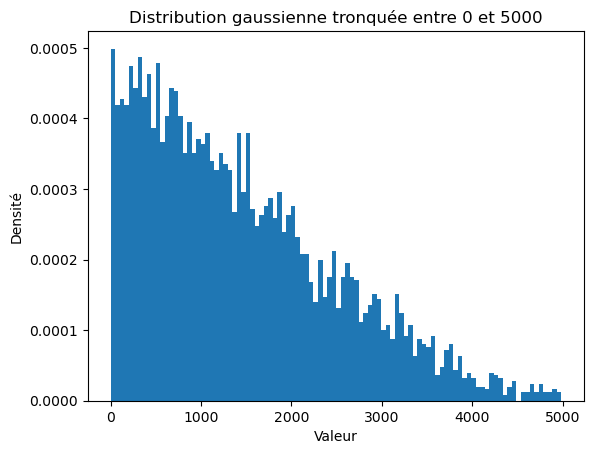

1459


In [342]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la gaussienne
mu = -10    # moyenne (pic)
sigma = 1800  # écart-type (dispersion)

# Tirer 10000 échantillons d'une normale
samples = np.random.normal(mu, sigma, 10000)

# On veut uniquement les valeurs entre 0 et 5000 (domaine valide)
samples = samples[(samples >= 0) & (samples <= 5000)]

# Si tu veux des entiers
samples = samples.astype(int)

# Afficher l'histogramme
plt.hist(samples, bins=100, density=True)
plt.title("Distribution gaussienne tronquée entre 0 et 5000")
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.show()

# Tirer une valeur aléatoire dans la distribution (échantillon simple)
def sample():
    return np.random.choice(samples)

# Exemple
print(sample())


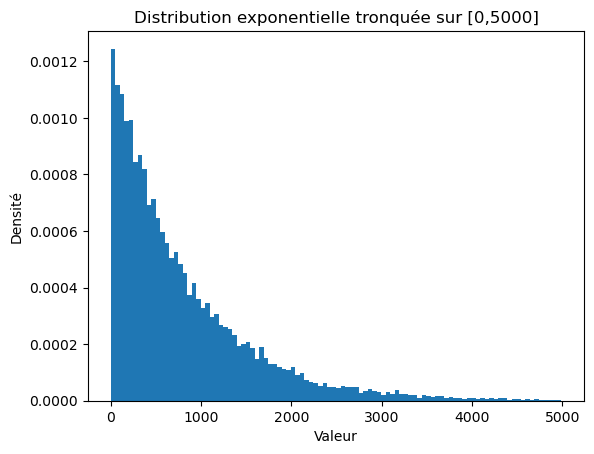

737


In [344]:
import numpy as np
import matplotlib.pyplot as plt

scale = 800  # paramètre lambda de l'exponentielle (plus petit = plus concentré vers 0)

# Tirer 20000 valeurs exponentielles
samples = np.random.exponential(scale, 20000)

# Ne garder que les valeurs <= 5000
samples = samples[samples <= 5000]

# Convertir en int
samples = samples.astype(int)

plt.hist(samples, bins=100, density=True)
plt.title("Distribution exponentielle tronquée sur [0,5000]")
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.show()

def sample():
    return np.random.choice(samples)

print(sample())


In [347]:
vals1 = np.linspace(0.3, 1.35, 600)
vals2 = np.linspace(1.35, 1.410, 15)
vals3 = np.linspace(1.410, 1.82, 250)
vals4 = np.linspace(1.82, 1.93, 15)
vals5 = np.linspace(1.93, 2.5, 320)

lamda_values = np.concatenate([vals1, vals2, vals3, vals4])

In [348]:
lamda_values

array([0.3       , 0.30175292, 0.30350584, 0.30525876, 0.30701169,
       0.30876461, 0.31051753, 0.31227045, 0.31402337, 0.31577629,
       0.31752922, 0.31928214, 0.32103506, 0.32278798, 0.3245409 ,
       0.32629382, 0.32804674, 0.32979967, 0.33155259, 0.33330551,
       0.33505843, 0.33681135, 0.33856427, 0.3403172 , 0.34207012,
       0.34382304, 0.34557596, 0.34732888, 0.3490818 , 0.35083472,
       0.35258765, 0.35434057, 0.35609349, 0.35784641, 0.35959933,
       0.36135225, 0.36310518, 0.3648581 , 0.36661102, 0.36836394,
       0.37011686, 0.37186978, 0.3736227 , 0.37537563, 0.37712855,
       0.37888147, 0.38063439, 0.38238731, 0.38414023, 0.38589316,
       0.38764608, 0.389399  , 0.39115192, 0.39290484, 0.39465776,
       0.39641068, 0.39816361, 0.39991653, 0.40166945, 0.40342237,
       0.40517529, 0.40692821, 0.40868114, 0.41043406, 0.41218698,
       0.4139399 , 0.41569282, 0.41744574, 0.41919866, 0.42095159,
       0.42270451, 0.42445743, 0.42621035, 0.42796327, 0.42971

In [ ]:
batches=[]
batches[0] = lamda_values[0:650]        # → valeurs 0 à 199
batches[1] = lamda_values[650:900]      # → valeurs 200 à 399
batches[2] = lamda_values[900:930]
batches[3] = lamda_values[930:1200]

In [3]:
from functions import *
import pytools4dart as ptd
import pandas as pd
import random
import os
import numpy as np
from concurrent.futures import ProcessPoolExecutor

# Définir les modèles de gaz et les longueurs d'onde
Gaz_Model = ['USSTD76', 'TROPICAL']
'''intervals = [
    np.linspace(0.3, 1.35, 650, dtype=np.float32),
    np.linspace(1.35, 1.410, 15, dtype=np.float32),
    np.linspace(1.410, 1.82, 250, dtype=np.float32),
    np.linspace(1.82, 1.93, 15, dtype=np.float32),
    np.linspace(1.93, 2.5, 270, dtype=np.float32),
]
lamda_values = np.concatenate(intervals)
batches=[]
batches[0] = lamda_values[0:650]        # → valeurs 0 à 199
batches[1] = lamda_values[650:900]      # → valeurs 200 à 399
batches[2] = lamda_values[900:930]
batches[3] = lamda_values[930:1200]'''
lamda_values=[0.4,0.56,0.8,1.3,1.7,2.3]
colonnes = ["Tg_scat", "Tg_abs", "AOD", "SSA", "g1", "Z", "Zenith_Angle", "reflectance", "BOA_RT"]

# Fonction qui traite un batch de 200 longueurs d’onde
def run_batch(lambdas, batch_id):
    print(f"Batch {batch_id} starting with lambdas {lambdas}")
    sim = ptd.simulation(f'RTM_reference{batch_id}')
    Edit_lambda(lambdas,batch_id)
    l=len(lambdas)
    csv_path = f"batch_{batch_id}.csv"
    if not os.path.exists(csv_path):
        pd.DataFrame(columns=colonnes).to_csv(csv_path, index=False)

    for i in range(2):
        model_gaz = random.choice(Gaz_Model)
        k_gaz = k_gaz_TROPICAL() if model_gaz == 'TROPICAL' else k_gaz_USDT()
        K_aero = K_aerosol()
        reflectance = np.random.rand(l).tolist()
        reflectance.insert(0, 1)
        theta = random.randint(1, 89)
        z = z_value()

        Edit_GasModel(model_gaz,batch_id)
        Edit_AerosolFactor(K_aero,batch_id)
        Edit_GasFactor(k_gaz,batch_id)
        Edit_reflectance(reflectance,batch_id)
        Edit_zenith_angle(theta,batch_id)
        Edit_altitude(z,batch_id)
        sim.run.full()

        atmosphere_params = atmosphere_param(z, theta,batch_id)
        BOA_RT = EXTRACT_BOA_RT(batch_id,l)

        df_temp = pd.DataFrame(atmosphere_params, columns=colonnes[:-2])
        df_temp['reflectance'] = reflectance[1:]
        df_temp['BOA_RT'] = BOA_RT
        df_temp.to_csv(csv_path, mode='a', header=False, index=False)
        print(f"-----------------simulation num {i} in Batch {batch_id} finished.----------------------------")



# Point d’entrée principal
if __name__ == "__main__":
    # Créer l'en-tête s’il n’existe pas
    if not os.path.exists("new_data.csv"):
        pd.DataFrame(columns=colonnes).to_csv("new_data.csv", index=False)

    # Créer les 6 batches de 200 λ chacun
    
    batches = [lamda_values[i * 2:(i + 1) * 2] for i in range(3)]
    # Lancer les 6 processus en parallèle
    with ProcessPoolExecutor(max_workers=6) as executor:
        futures = [executor.submit(run_batch, batch, i) for i, batch in enumerate(batches)]
        for future in futures:
            future.result()  # Assure-toi que tout est bien terminé

    # Fusionner les fichiers batchs dans un seul fichier final
    dfs = [pd.read_csv(f"batch_{i}.csv") for i in range(3)]
    final_df = pd.concat(dfs)
    final_df.to_csv("new_data.csv", index=False)

    # Nettoyer les fichiers temporaires
    '''for i in range(2):
        os.remove(f"batch_{i}.csv")'''


Batch 1 starting with lambdas [0.8, 1.3]Batch 0 starting with lambdas [0.4, 0.56]Batch 2 starting with lambdas [1.7, 2.3]




Updating optical properties indexes...
Updating optical properties indexes...
Updating optical properties indexes...
Updating thermal properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating spectral multiplicative factors...
Updating band numbers...
Updating band numbers...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...
Updating optical properties indexes...
Updating optical properties indexes...
Updating optical properties indexes...
Updating thermal properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating spectral multiplicative factors...Updating band numbers...

Updating band numbers...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...
Updating optical properties indexes...
Updating optical properties indexes...
Updating optical properties indexes...
U

In [4]:
def k_gaz_USDT():
    x = np.linspace(0, 2.1, 1000)

    weights = np.piecewise(
        x,
        [x < 0.2, x >= 0.2],
        [lambda x: x / 0.2, 1]
    )

    weights /= weights.sum()

    # Tirer UNE valeur
    value = np.random.choice(x, size=1, p=weights)[0]
    return value

In [5]:
def z_value():
    scale = 700  # plus petit = plus concentré vers 0
    while True:
        z = np.random.exponential(scale)
        if z <= 6000:
            return int(z)

z_values = [z_value() for _ in range(8000)]

In [1]:
from functions import *
import pytools4dart as ptd
import pandas as pd
import random
import os
import numpy as np
from concurrent.futures import ProcessPoolExecutor

# Définir les modèles de gaz et les longueurs d'onde
Gaz_Model = ['USSTD76', 'TROPICAL']
'''intervals = [
    np.linspace(0.3, 1.35, 650, dtype=np.float32),
    np.linspace(1.35, 1.410, 15, dtype=np.float32),
    np.linspace(1.410, 1.82, 250, dtype=np.float32),
    np.linspace(1.82, 1.93, 15, dtype=np.float32),
    np.linspace(1.93, 2.5, 270, dtype=np.float32),
]
lamda_values = np.concatenate(intervals)'''
lamda_values=[0.4,0.56,0.8,1.3]
colonnes = ["Tg_scat", "Tg_abs", "AOD", "SSA", "g1", "Z", "Zenith_Angle", "reflectance", "BOA_RT"]

# Fonction qui traite un batch de 200 longueurs d’onde
def run_batch(lambdas, batch_id):
    print(f"Batch {batch_id} starting with lambdas {lambdas}")
    sim = ptd.simulation(f'RTM_reference{batch_id}')
    Edit_lambda(lambdas,batch_id)

    lignes = []
    for i in range(2):
        model_gaz = random.choice(Gaz_Model)
        k_gaz = k_gaz_TROPICAL() if model_gaz == 'TROPICAL' else k_gaz_USDT()
        K_aero = K_aerosol()
        reflectance = np.random.rand(2).tolist()
        reflectance.insert(0, 1)
        theta = random.randint(0, 89)
        z = z_value()

        Edit_GasModel(model_gaz,batch_id)
        Edit_AerosolFactor(K_aero,batch_id)
        Edit_GasFactor(k_gaz,batch_id)
        Edit_reflectance(reflectance,batch_id)
        Edit_zenith_angle(theta,batch_id)
        Edit_altitude(z,batch_id)
        sim.run.full()

        atmosphere_params = atmosphere_param(z, theta,batch_id)
        BOA_RT = EXTRACT_BOA_RT(batch_id)

        df_temp = pd.DataFrame(atmosphere_params, columns=colonnes[:-2])
        df_temp['reflectance'] = reflectance[1:]
        df_temp['BOA_RT'] = BOA_RT
        lignes.append(df_temp)
        print(f"-----------------simulation num {i} in Batch {batch_id} finished.----------------------------")

    df_batch = pd.concat(lignes)
    df_batch.to_csv(f"batch_{batch_id}.csv", index=False)

# Point d’entrée principal
if __name__ == "__main__":
    # Créer l'en-tête s’il n’existe pas
    if not os.path.exists("new_data.csv"):
        pd.DataFrame(columns=colonnes).to_csv("new_data.csv", index=False)

    # Créer les 6 batches de 200 λ chacun
    batches = [lamda_values[i * 2:(i + 1) * 2] for i in range(2)]

    # Lancer les 6 processus en parallèle
    with ProcessPoolExecutor(max_workers=6) as executor:
        futures = [executor.submit(run_batch, batch, i) for i, batch in enumerate(batches)]
        for future in futures:
            future.result()  # Assure-toi que tout est bien terminé

    # Fusionner les fichiers batchs dans un seul fichier final
    dfs = [pd.read_csv(f"batch_{i}.csv") for i in range(2)]
    final_df = pd.concat(dfs)
    final_df.to_csv("new_data.csv", index=False)

    # Nettoyer les fichiers temporaires
    '''for i in range(2):
        os.remove(f"batch_{i}.csv")'''


Batch 1 starting with lambdas [0.8, 1.3]Batch 0 starting with lambdas [0.4, 0.56]

Updating optical properties indexes...
Updating optical properties indexes...
Updating thermal properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating spectral multiplicative factors...
Updating band numbers...
Updating band numbers...
Updating optical properties indexes...
Updating optical properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...
Updating optical properties indexes...
Updating optical properties indexes...
Updating thermal properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating spectral multiplicative factors...
Updating band numbers...
Updating band numbers...
Updating optical properties indexes

In [5]:
batches = [lamda_values[i * 200:(i + 1) * 200] for i in range(6)]
batches[0] = lamda_values[0:200]        # → valeurs 0 à 199
batches[1] = lamda_values[200:400]      # → valeurs 200 à 399
batches[2] = lamda_values[400:600]
batches[3] = lamda_values[600:800]
batches[4] = lamda_values[800:1000]
batches[5] = lamda_values[1000:1200]    # → valeurs 1000 à 1199


In [6]:
batches = [lamda_values[i * 200:(i + 1) * 200] for i in range(6)]


In [8]:
len(batches)

6

In [6]:
def Edit_lambda(lamda_list,batch_id):
    sim=ptd.simulation(f'RTM_reference{batch_id}')
    sim.core.phase.set_nodes(meanLambda=lamda_list)
    sim.write(overwrite=True)

In [ ]:
lamda_values

In [8]:
Edit_lambda(lamda_values[2:4],1)

Updating optical properties indexes...
Updating thermal properties indexes...
Updating spectral multiplicative factors...
Updating band numbers...


In [3]:
def z_value():
    mean = 0        # moyenne autour de laquelle tu veux le pic
    std = 1400          # écart type (plus petit = pic plus serré)
    low = 0            # valeur minimale (tronquée)
    high = 7000        # valeur maximale (tronquée)

    # Calcul des bornes standardisées pour truncnorm
    a, b = (low - mean) / std, (high - mean) / std
    z = truncnorm.rvs(a, b, loc=mean, scale=std)
    
    return int(z)


In [15]:
for _ in range(10):
    print(z_value())

1922
3219
1924
766
10
1272
620
3391
527
1012


In [113]:
def a():
    def z_value():
        scale = 1000  # plus petit = plus concentré vers 0
        while True:
            z = np.random.exponential(scale)
            if z <= 7000:
                return int(z)
    z_values = [z_value() for _ in range(6000)]
    return random.choice(z_values)   
z_values = [a() for _ in range(6000)]

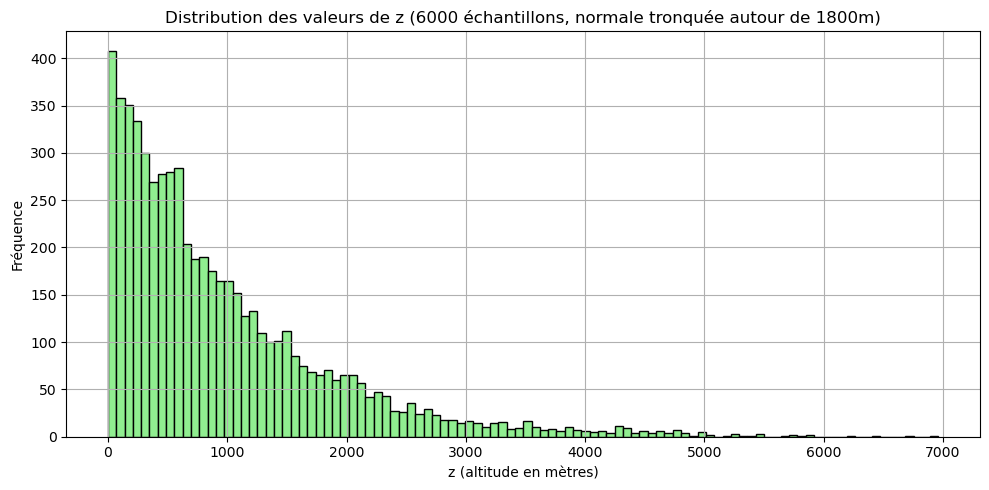

In [114]:
import matplotlib.pyplot as plt

# Tracer l'histogramme
plt.figure(figsize=(10, 5))
plt.hist(z_values, bins=100, color='lightgreen', edgecolor='black')
plt.title("Distribution des valeurs de z (6000 échantillons, normale tronquée autour de 1800m)")
plt.xlabel("z (altitude en mètres)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def z_value():
    def a():
        scale = 00  # plus petit = plus concentré vers 0
        while True:
            z = np.random.exponential(scale)
            if z <= 6000:
                return int(z)
    z_values = [a() for _ in range(8000)]
    return random.choice(z_values)

In [104]:
z_value()

355

In [108]:
def a():
    scale = 00  # plus petit = plus concentré vers 0
    while True:
        z = np.random.exponential(scale)
        if z <= 6000:
            return int(z)

In [109]:
z_values = [a() for _ in range(8000)]

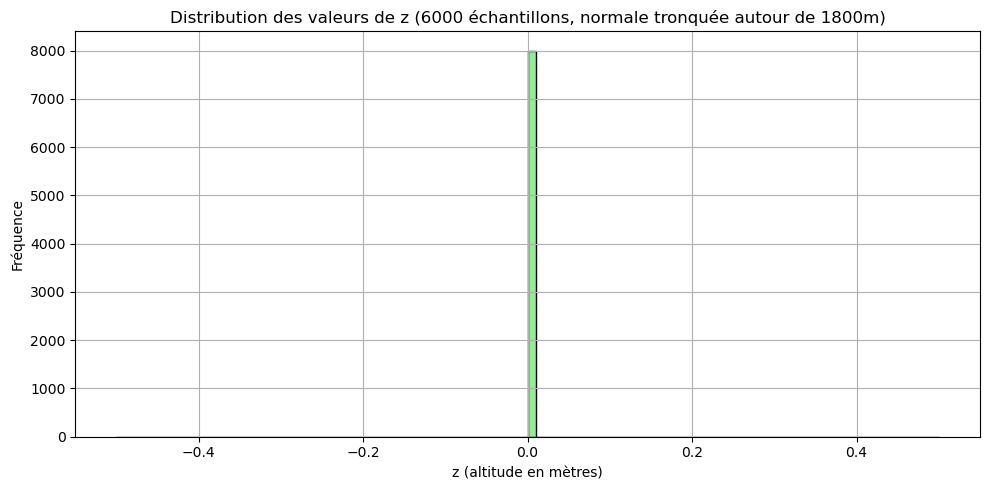

In [110]:
import matplotlib.pyplot as plt

# Tracer l'histogramme
plt.figure(figsize=(10, 5))
plt.hist(z_values, bins=100, color='lightgreen', edgecolor='black')
plt.title("Distribution des valeurs de z (6000 échantillons, normale tronquée autour de 1800m)")
plt.xlabel("z (altitude en mètres)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()
